In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error
import shap  # library for explaining model predictions


In [ ]:
# Load the prepared dataset
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')


In [3]:
data_fin_imprt.head(15)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,7.581210,1960,4.727388,6.461468,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,...,False,False,False,True,False,False,False,False,True,False
2,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,4.543295,9.320181,7,1.791759,7.585281,1968,0.000000,6.971669,0.000000,...,False,False,False,True,False,False,False,False,True,False
4,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,...,False,False,False,True,False,False,False,False,True,False
5,4.110874,4.369448,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,...,False,False,False,True,False,False,False,False,True,False
6,4.795791,3.737670,8.501267,8,1.791759,7.601902,2001,0.000000,6.424869,0.000000,...,False,False,False,True,False,False,False,False,True,False
7,4.795791,3.784190,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,...,False,False,False,True,False,False,False,False,True,False
8,4.795791,3.688879,8.592301,8,1.791759,7.598900,1996,0.000000,7.074117,0.000000,...,False,False,False,True,False,False,False,False,True,False
9,4.110874,4.110874,8.922792,7,1.791759,7.600902,1999,0.000000,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# Split data into features and target, then create train/test split
x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Train the basic SVR model
SVR_mod = SVR()
SVR_mod.fit(x_train, y_train)
SVR_pred = SVR_mod.predict(x_test) 

In [6]:
SVR_mod_sc=SVR_mod.score(x_train,y_train)
print('Support Vector Regression Model Score  : ',round(SVR_mod_sc,3))
r2=r2_score(y_test,SVR_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,SVR_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,SVR_pred,squared = False)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, SVR_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(SVR_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model

Support Vector Regression Model Score  :  0.489
R Sq. Value :  0.57
Adjusted R Sq. Value is :  0.526
Mean Square Error is :  0.079
Root Mean Square Error is :  0.282
Mean Absoulue Error is :  0.211
Accuracy : 50.28 %


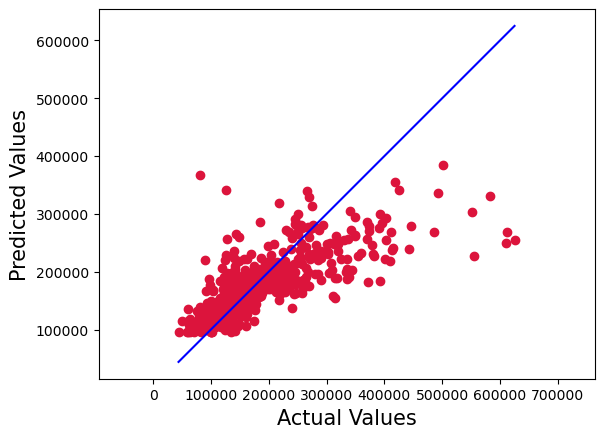

In [ ]:
# Plot actual vs predicted prices (convert from log scale back to dollars)
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(SVR_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


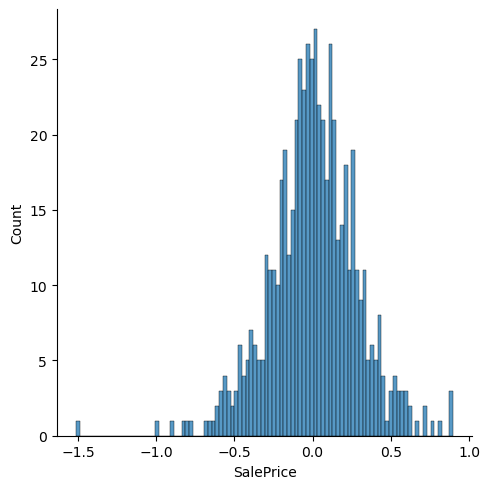

In [ ]:
# Plot distribution of residuals
sb.displot((y_test-SVR_pred),bins=100); 

In [ ]:
# Define hyperparameters for grid search
param = {
    'verbose' : [2,4,6],
    'C' : [1,5,10],
    'gamma' : [0.1, 0.5]
}

G_CV_lin_rid = GridSearchCV(estimator=SVR_mod, param_grid=param, cv= 5) 
#  using grid search method to optimise model with hyperparameter tuning

G_CV_lin_rid.fit(x_train, y_train)# fitting the model
G_CV_lin_rid.best_params_ # displaying optimised parameters for optimal tuning of model

[LibSVM].*
optimization finished, #iter = 1994
obj = -99.290848, rho = -12.025296
nSV = 1474, nBSV = 21
[LibSVM].*
optimization finished, #iter = 1948
obj = -97.184140, rho = -12.019682
nSV = 1498, nBSV = 21
[LibSVM].*.*
optimization finished, #iter = 2117
obj = -99.089400, rho = -12.023370
nSV = 1483, nBSV = 21
[LibSVM].*
optimization finished, #iter = 1879
obj = -97.864174, rho = -12.018704
nSV = 1465, nBSV = 21
[LibSVM].*
optimization finished, #iter = 1812
obj = -100.410792, rho = -12.018661
nSV = 1470, nBSV = 22
[LibSVM].*
optimization finished, #iter = 1994
obj = -99.290848, rho = -12.025296
nSV = 1474, nBSV = 21
[LibSVM].*
optimization finished, #iter = 1948
obj = -97.184140, rho = -12.019682
nSV = 1498, nBSV = 21
[LibSVM].*.*
optimization finished, #iter = 2117
obj = -99.089400, rho = -12.023370
nSV = 1483, nBSV = 21
[LibSVM].*
optimization finished, #iter = 1879
obj = -97.864174, rho = -12.018704
nSV = 1465, nBSV = 21
[LibSVM].*
optimization finished, #iter = 1812
obj = -100.4

{'C': 5, 'gamma': 0.1, 'verbose': 2}

In [ ]:
# Retrain model with optimized hyperparameters
SVR_mod = SVR(gamma=0.1 ,C=5,verbose=2)
SVR_mod.fit(x_train, y_train)
SVR_pred = SVR_mod.predict(x_test)

[LibSVM].*.*
optimization finished, #iter = 2434
obj = -126.059524, rho = -12.018832
nSV = 1840, nBSV = 0


In [11]:
SVR_mod_sc=SVR_mod.score(x_train,y_train)
print('Support Vector Regression Model Score  : ',round(SVR_mod_sc,3))
r2=r2_score(y_test,SVR_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,SVR_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,SVR_pred,squared = False)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, SVR_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(SVR_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

Support Vector Regression Model Score  :  0.946
R Sq. Value :  0.02
Adjusted R Sq. Value is :  -0.08
Mean Square Error is :  0.181
Root Mean Square Error is :  0.425
Mean Absoulue Error is :  0.332
[LibSVM].*.*
optimization finished, #iter = 2717
obj = -124.795806, rho = -12.013951
nSV = 1857, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2504
obj = -130.396493, rho = -12.034381
nSV = 1846, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2490
obj = -129.794426, rho = -12.035887
nSV = 1868, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2473
obj = -132.695467, rho = -12.028174
nSV = 1819, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2640
obj = -131.797619, rho = -12.034596
nSV = 1850, nBSV = 0
Accuracy : 0.88 %


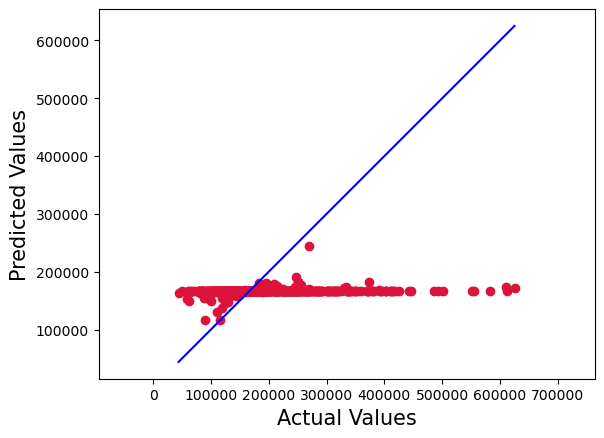

In [ ]:
# Plot actual vs predicted prices (convert from log scale back to dollars)
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(SVR_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


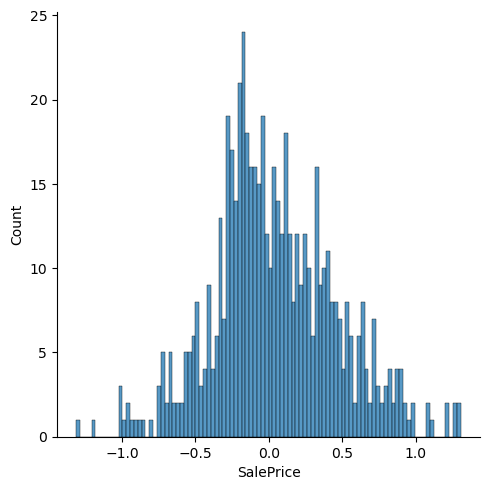

In [ ]:
# Plot distribution of residuals
sb.displot((y_test-SVR_pred),bins=100); 